# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project: Finding Donors for *CharityML*


In this project, I employed several supervised algorithms to accurately model individuals' income using data collected from the 1994 U.S. Census. I then identified the best candidate algorithm from preliminary results and further optimized this algorithm to best model the data.

The goal of this analysis is to construct a model that accurately predicts whether an individual makes more than $50,000 USD annually. This sort of task can is common in a non-profit settings, where organizations survive on donations.

Armed with information on an individual's income level aids non-profits in understanding how large of a donation to request, or whether they should contact certain individuals begin with. While it can be difficult to determine an individual's general income, we can (as we will see) infer this value from other publicly available features such as government census studies.

The dataset for this project originates from the UCI Machine Learning Repository. The datset was donated by Ron Kohavi and Barry Becker, after being published in the article "Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid". You can find the article by Ron Kohavi online. The data we investigate here consists of small changes to the original dataset, such as removing the 'fnlwgt' feature and records with missing or ill-formatted entries.

I completed this project as part of the Udacity Machine Learning Engineer Nano Degree

In [92]:
#Importing Important Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")
sns.set_style('whitegrid')
from IPython.display import display # Allows the use of display() for DataFrames
import visuals as vs

In [174]:
#Checking the Working Directory for the data inside
os.listdir()

['.ipynb_checkpoints',
 'census.csv',
 'Finding Donors Classification Project.ipynb',
 'finding_donors Project.ipynb',
 'finding_donors.ipynb',
 'project_description.md',
 'README.md',
 'visuals.py',
 '__pycache__']

In [175]:
data = pd.read_csv('census.csv')

In [176]:
data.head()

age          workclass education_level  education-num       marital-status  \
0   39          State-gov       Bachelors           13.0        Never-married   
1   50   Self-emp-not-inc       Bachelors           13.0   Married-civ-spouse   
2   38            Private         HS-grad            9.0             Divorced   
3   53            Private            11th            7.0   Married-civ-spouse   
4   28            Private       Bachelors           13.0   Married-civ-spouse   

           occupation    relationship    race      sex  capital-gain  \
0        Adm-clerical   Not-in-family   White     Male        2174.0   
1     Exec-managerial         Husband   White     Male           0.0   
2   Handlers-cleaners   Not-in-family   White     Male           0.0   
3   Handlers-cleaners         Husband   Black     Male           0.0   
4      Prof-specialty            Wife   Black   Female           0.0   

   capital-loss  hours-per-week  native-country income  
0           0.0            40.0   United-States  <=50K  
1           0.0            13.0   United-States  <=50K  
2           0.0            40.0   United-States  <=50K  
3           0.0            40.0   United-States  <=50K  
4           0.0            40.0            Cuba  <=50K

## Step 1 : Performing Explanatory Data Analysis (EDA)

The step is very preliminary and important to have an insights into what is happening in the data as well as uncover insights

In [177]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
age                45222 non-null int64
workclass          45222 non-null object
education_level    45222 non-null object
education-num      45222 non-null float64
marital-status     45222 non-null object
occupation         45222 non-null object
relationship       45222 non-null object
race               45222 non-null object
sex                45222 non-null object
capital-gain       45222 non-null float64
capital-loss       45222 non-null float64
hours-per-week     45222 non-null float64
native-country     45222 non-null object
income             45222 non-null object
dtypes: float64(4), int64(1), object(9)
memory usage: 4.8+ MB


In [178]:
data.isnull().sum()

age                0
workclass          0
education_level    0
education-num      0
marital-status     0
occupation         0
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [179]:
#To determine the number of people earning >50K and <= 50K
data['income'].value_counts(normalize=True)*100

<=50K    75.215603
>50K     24.784397
Name: income, dtype: float64

From the result above, we see that more people earn less than 50K from the total observations in the dataset. Also, the `Target Variable` which is to determine if a person earn `above 50K` or `less than 50K`. Transforming the column data to a numerical data that can be fed into our model

In [180]:
data['income'] = data['income'].apply(lambda x: 1 if x=='>50K' else 0)

In [181]:
data.head()

age          workclass education_level  education-num       marital-status  \
0   39          State-gov       Bachelors           13.0        Never-married   
1   50   Self-emp-not-inc       Bachelors           13.0   Married-civ-spouse   
2   38            Private         HS-grad            9.0             Divorced   
3   53            Private            11th            7.0   Married-civ-spouse   
4   28            Private       Bachelors           13.0   Married-civ-spouse   

           occupation    relationship    race      sex  capital-gain  \
0        Adm-clerical   Not-in-family   White     Male        2174.0   
1     Exec-managerial         Husband   White     Male           0.0   
2   Handlers-cleaners   Not-in-family   White     Male           0.0   
3   Handlers-cleaners         Husband   Black     Male           0.0   
4      Prof-specialty            Wife   Black   Female           0.0   

   capital-loss  hours-per-week  native-country  income  
0           0.0            40.0   United-States       0  
1           0.0            13.0   United-States       0  
2           0.0            40.0   United-States       0  
3           0.0            40.0   United-States       0  
4           0.0            40.0            Cuba       0

In [182]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
age                45222 non-null int64
workclass          45222 non-null object
education_level    45222 non-null object
education-num      45222 non-null float64
marital-status     45222 non-null object
occupation         45222 non-null object
relationship       45222 non-null object
race               45222 non-null object
sex                45222 non-null object
capital-gain       45222 non-null float64
capital-loss       45222 non-null float64
hours-per-week     45222 non-null float64
native-country     45222 non-null object
income             45222 non-null int64
dtypes: float64(4), int64(2), object(8)
memory usage: 4.8+ MB


In [183]:
data['income'].value_counts()

0    34014
1    11208
Name: income, dtype: int64

In [184]:
data.corr()['income']

age               0.237040
education-num     0.332800
capital-gain      0.221034
capital-loss      0.148687
hours-per-week    0.227199
income            1.000000
Name: income, dtype: float64

### Univariant Analysis

In [185]:
data['workclass'].value_counts(normalize=True)*100

 Private             73.652205
 Self-emp-not-inc     8.394144
 Local-gov            6.855071
 State-gov            4.303215
 Self-emp-inc         3.639821
 Federal-gov          3.109106
 Without-pay          0.046438
Name: workclass, dtype: float64

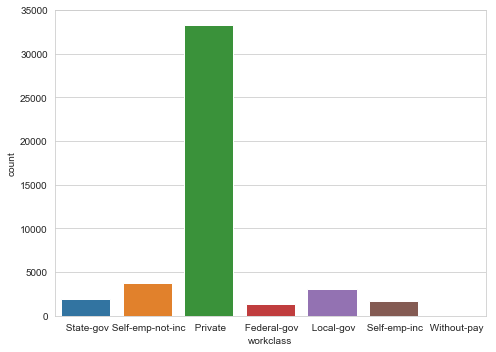

In [186]:
plt.figure(figsize=(7,5))
sns.countplot(x = 'workclass', data= data)
plt.tight_layout()


In [187]:
work_class={' Private':'Class_A',
            ' Self-emp-not-inc':'Class_B',
            ' State-gov':'Class_C',' Federal-gov':'Class_C',' Self-emp-inc':'Class_C',' Without-pay':'Class_C',' Local-gov':'Class_C' }

data['workclass'] = data['workclass'].replace(work_class)

In [188]:
data['workclass'].value_counts()

Class_A    33307
Class_C     8119
Class_B     3796
Name: workclass, dtype: int64

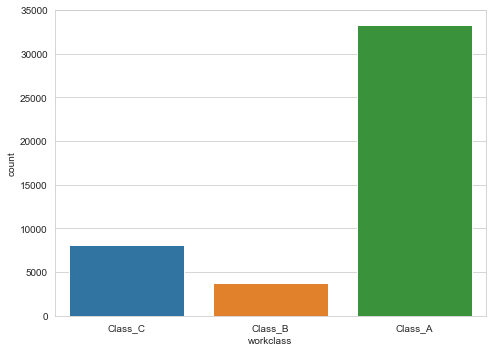

In [189]:
plt.figure(figsize=(7,5))
sns.countplot(x = 'workclass', data= data)
plt.tight_layout()

From the displayed result, we can see that we have more private working class in our data set

In [190]:
data['education_level'].value_counts(normalize=True)*100

 HS-grad         32.689841
 Some-college    21.889788
 Bachelors       16.739640
 Masters          5.559241
 Assoc-voc        4.331962
 11th             3.580116
 Assoc-acdm       3.332449
 10th             2.704436
 7th-8th          1.819911
 Prof-school      1.735881
 9th              1.494848
 12th             1.275928
 Doctorate        1.202954
 5th-6th          0.992880
 1st-4th          0.490912
 Preschool        0.159215
Name: education_level, dtype: float64

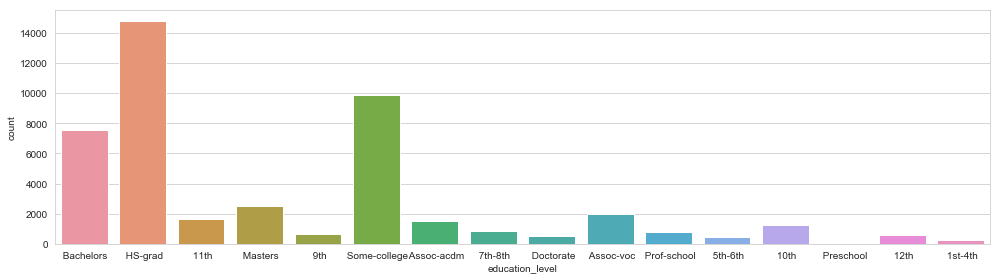

In [191]:
plt.figure(figsize=(14,4))
sns.countplot(x = 'education_level', data= data)
plt.tight_layout()

From the data above we see that the `High School Graduate` seem to dominate our data set in our observations.

In [192]:
data['education_level'].value_counts(normalize=True)*100

 HS-grad         32.689841
 Some-college    21.889788
 Bachelors       16.739640
 Masters          5.559241
 Assoc-voc        4.331962
 11th             3.580116
 Assoc-acdm       3.332449
 10th             2.704436
 7th-8th          1.819911
 Prof-school      1.735881
 9th              1.494848
 12th             1.275928
 Doctorate        1.202954
 5th-6th          0.992880
 1st-4th          0.490912
 Preschool        0.159215
Name: education_level, dtype: float64

In [193]:
def education_level(level):
    if level in [' HS-grad']:
        return 'Level_1'
    elif level in [' Some-college']:
        return 'Level_2'
    elif level in [' Bachelors']:
        return 'Level_3'
    else:
        return 'Level_4'

In [194]:
data['education_level'] = data['education_level'].apply(lambda x: education_level(x))

In [195]:
data['education_level'].value_counts()

Level_1    14783
Level_4    12970
Level_2     9899
Level_3     7570
Name: education_level, dtype: int64

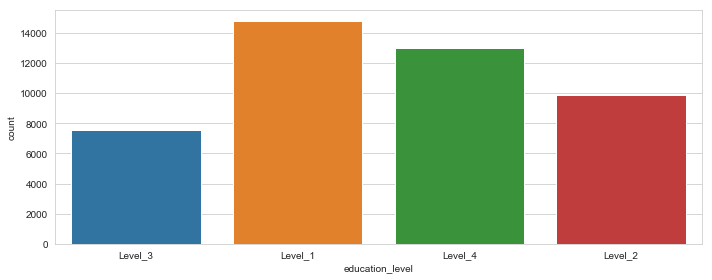

In [198]:
plt.figure(figsize=(10,4))
sns.countplot(x = 'education_level', data= data)
plt.tight_layout()

In [201]:
data.describe(include=[np.object, pd.Categorical]).T

count unique                  top   freq
workclass        45222      3              Class_A  33307
education_level  45222      4              Level_1  14783
marital-status   45222      7   Married-civ-spouse  21055
occupation       45222     14         Craft-repair   6020
relationship     45222      6              Husband  18666
race             45222      5                White  38903
sex              45222      2                 Male  30527
native-country   45222     41        United-States  41292

In [204]:
data['marital-status'].value_counts(normalize=True)*100

 Married-civ-spouse       46.559197
 Never-married            32.280748
 Divorced                 13.924638
 Separated                 3.120163
 Widowed                   2.823847
 Married-spouse-absent     1.220645
 Married-AF-spouse         0.070762
Name: marital-status, dtype: float64

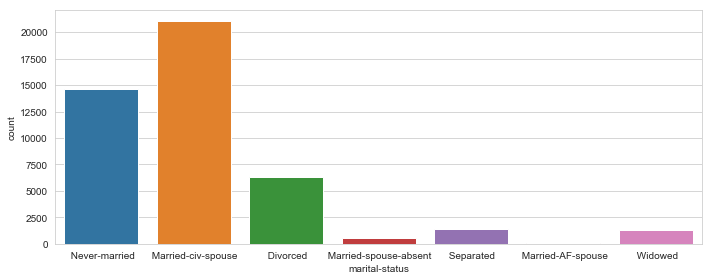

In [206]:
plt.figure(figsize=(10,4))
sns.countplot(x = 'marital-status', data= data)
plt.tight_layout()

In [212]:
def marital_status(status):
    if status in [' Married-civ-spouse']:
        return 'Status_1'
    elif status in [' Never-married']:
        return 'Status_2'
    elif status in [' Divorced'] :
        return 'Status_3'
    else:
        return 'Status_4'

In [213]:
data['marital-status'] = data['marital-status'].apply(lambda x: marital_status(x))

In [215]:
data['marital-status'].value_counts()

Status_1    21055
Status_2    14598
Status_3     6297
Status_4     3272
Name: marital-status, dtype: int64

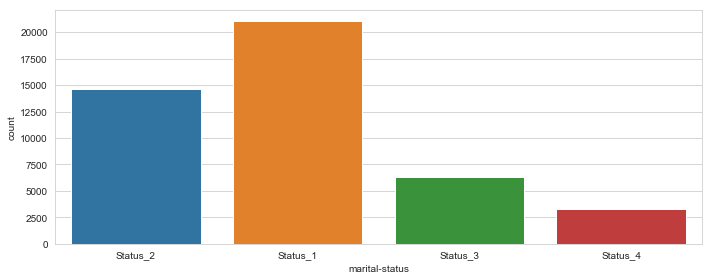

In [216]:
plt.figure(figsize=(10,4))
sns.countplot(x = 'marital-status', data= data)
plt.tight_layout()

In [217]:
data['occupation'].value_counts()

 Craft-repair         6020
 Prof-specialty       6008
 Exec-managerial      5984
 Adm-clerical         5540
 Sales                5408
 Other-service        4808
 Machine-op-inspct    2970
 Transport-moving     2316
 Handlers-cleaners    2046
 Farming-fishing      1480
 Tech-support         1420
 Protective-serv       976
 Priv-house-serv       232
 Armed-Forces           14
Name: occupation, dtype: int64

In [22]:
data['relationship'].value_counts()

 Husband           18666
 Not-in-family     11702
 Own-child          6626
 Unmarried          4788
 Wife               2091
 Other-relative     1349
Name: relationship, dtype: int64

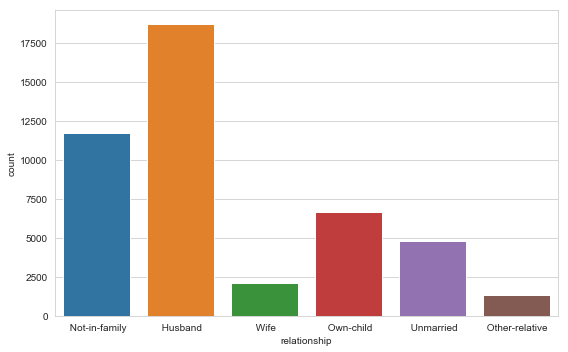

In [23]:
plt.figure(figsize=(8,5))
sns.countplot(x = 'relationship', data= data)
plt.tight_layout()

In [219]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
age                45222 non-null int64
workclass          45222 non-null object
education_level    45222 non-null object
education-num      45222 non-null float64
marital-status     45222 non-null object
occupation         45222 non-null object
relationship       45222 non-null object
race               45222 non-null object
sex                45222 non-null object
capital-gain       45222 non-null float64
capital-loss       45222 non-null float64
hours-per-week     45222 non-null float64
native-country     45222 non-null object
income             45222 non-null int64
dtypes: float64(4), int64(2), object(8)
memory usage: 4.8+ MB


In [220]:
data['sex'].value_counts()

 Male      30527
 Female    14695
Name: sex, dtype: int64

In [221]:
data['race'].value_counts()

 White                 38903
 Black                  4228
 Asian-Pac-Islander     1303
 Amer-Indian-Eskimo      435
 Other                   353
Name: race, dtype: int64

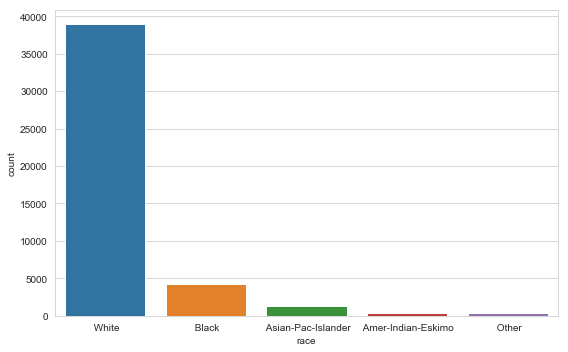

In [27]:
plt.figure(figsize=(8,5))
sns.countplot(x = 'race', data= data)
plt.tight_layout()

In [222]:
sum(data['race']==' White')/len(data) * 100

86.02671266197869

From the result above, we see that `White` dominated the dataset with a `86%`. Through this result we can decide to create another feature known as `Is_white`

In [223]:
data['Is_White']= data['race'].apply(lambda x: 'Yes' if x==' White' else 'No')

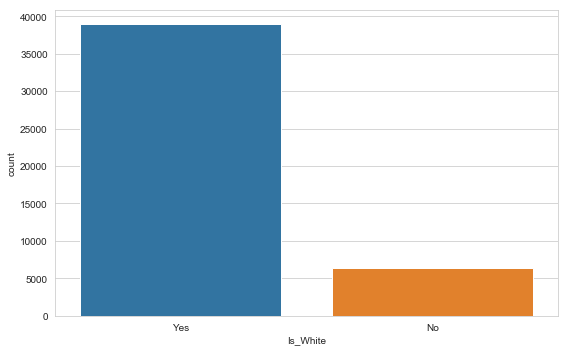

In [224]:
plt.figure(figsize=(8,5))
sns.countplot(x = 'Is_White', data= data)
plt.tight_layout()

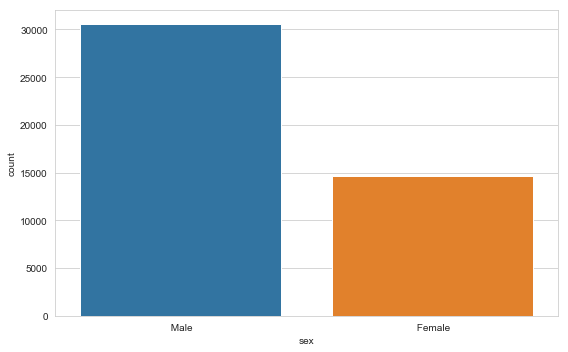

In [225]:
plt.figure(figsize=(8,5))
sns.countplot(x = 'sex', data= data)
plt.tight_layout()

In [226]:
list(data.columns)

['age',
 'workclass',
 'education_level',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'income',
 'Is_White']

In [227]:
data.drop(['race'],axis=1,inplace=True)

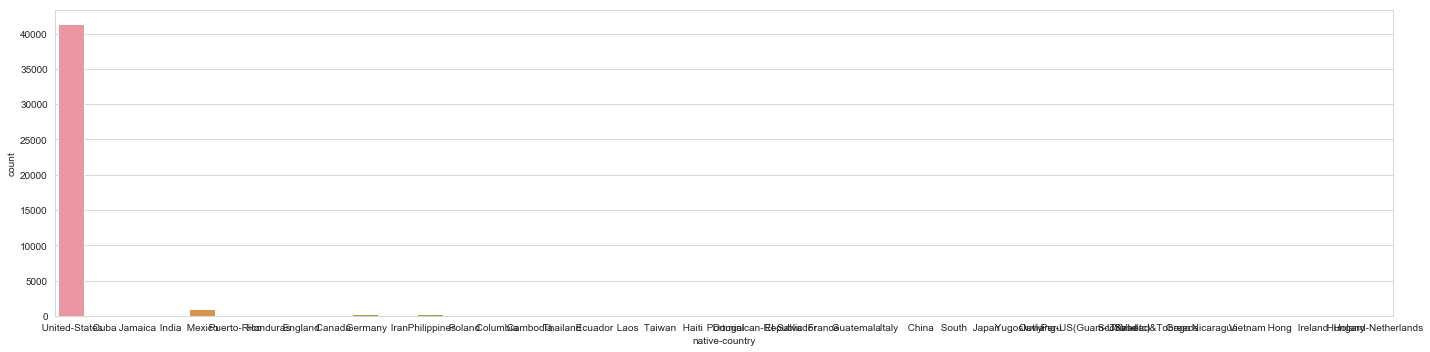

In [228]:
plt.figure(figsize=(20,5))
sns.countplot(x = 'native-country', data= data)
plt.tight_layout()

From the result obtained above, we see that it is dominated with `United-States` native-country. Similarly we can create another feature known as `Is_USA` to determine is the perform is from USA or not.

In [229]:
data['native-country'].value_counts().head()

 United-States    41292
 Mexico             903
 Philippines        283
 Germany            193
 Puerto-Rico        175
Name: native-country, dtype: int64

In [230]:
data['Is_USA']= data['native-country'].apply(lambda x: 'Yes' if x==' United-States' else 'No')

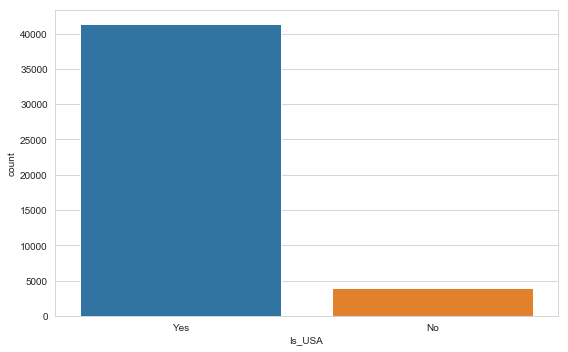

In [231]:
plt.figure(figsize=(8,5))
sns.countplot(x = 'Is_USA', data= data)
plt.tight_layout()

In [232]:
data.head()

age workclass education_level  education-num marital-status  \
0   39   Class_C         Level_3           13.0       Status_2   
1   50   Class_B         Level_3           13.0       Status_1   
2   38   Class_A         Level_1            9.0       Status_3   
3   53   Class_A         Level_4            7.0       Status_1   
4   28   Class_A         Level_3           13.0       Status_1   

           occupation    relationship      sex  capital-gain  capital-loss  \
0        Adm-clerical   Not-in-family     Male        2174.0           0.0   
1     Exec-managerial         Husband     Male           0.0           0.0   
2   Handlers-cleaners   Not-in-family     Male           0.0           0.0   
3   Handlers-cleaners         Husband     Male           0.0           0.0   
4      Prof-specialty            Wife   Female           0.0           0.0   

   hours-per-week  native-country  income Is_White Is_USA  
0            40.0   United-States       0      Yes    Yes  
1            13.0   United-States       0      Yes    Yes  
2            40.0   United-States       0      Yes    Yes  
3            40.0   United-States       0       No    Yes  
4            40.0            Cuba       0       No     No

<Figure size 432x288 with 0 Axes>

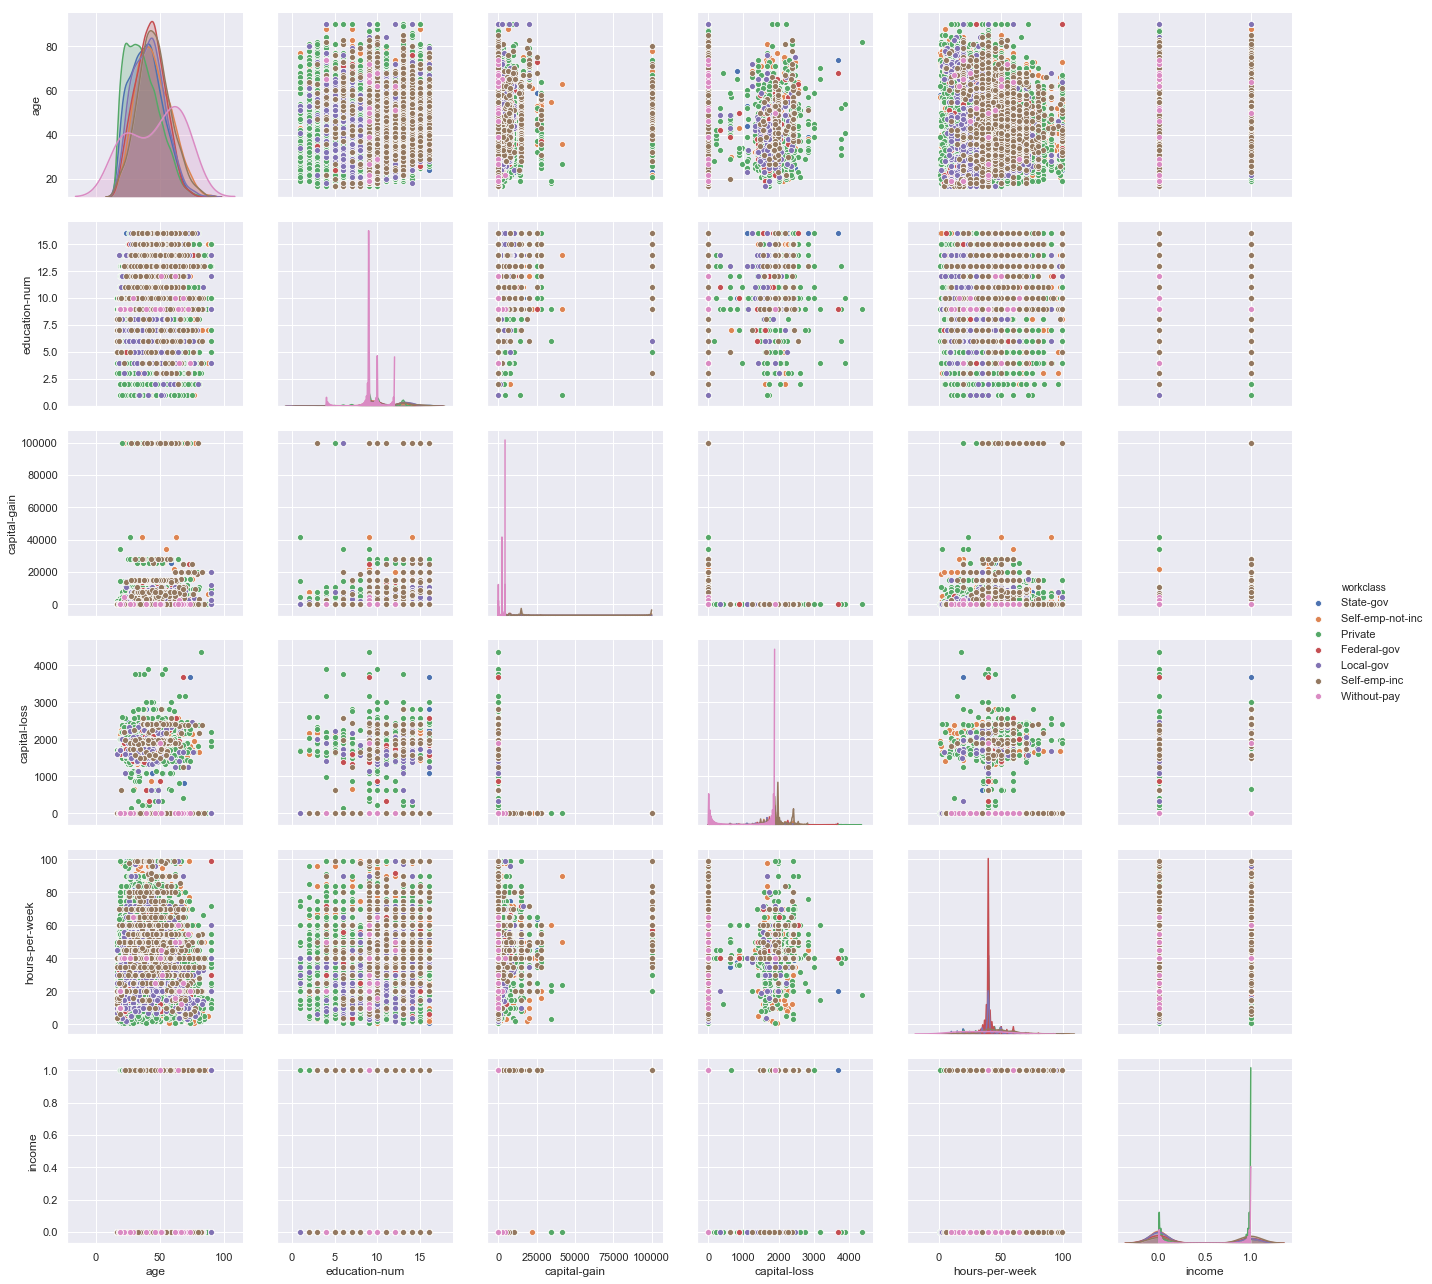

<Figure size 432x288 with 0 Axes>

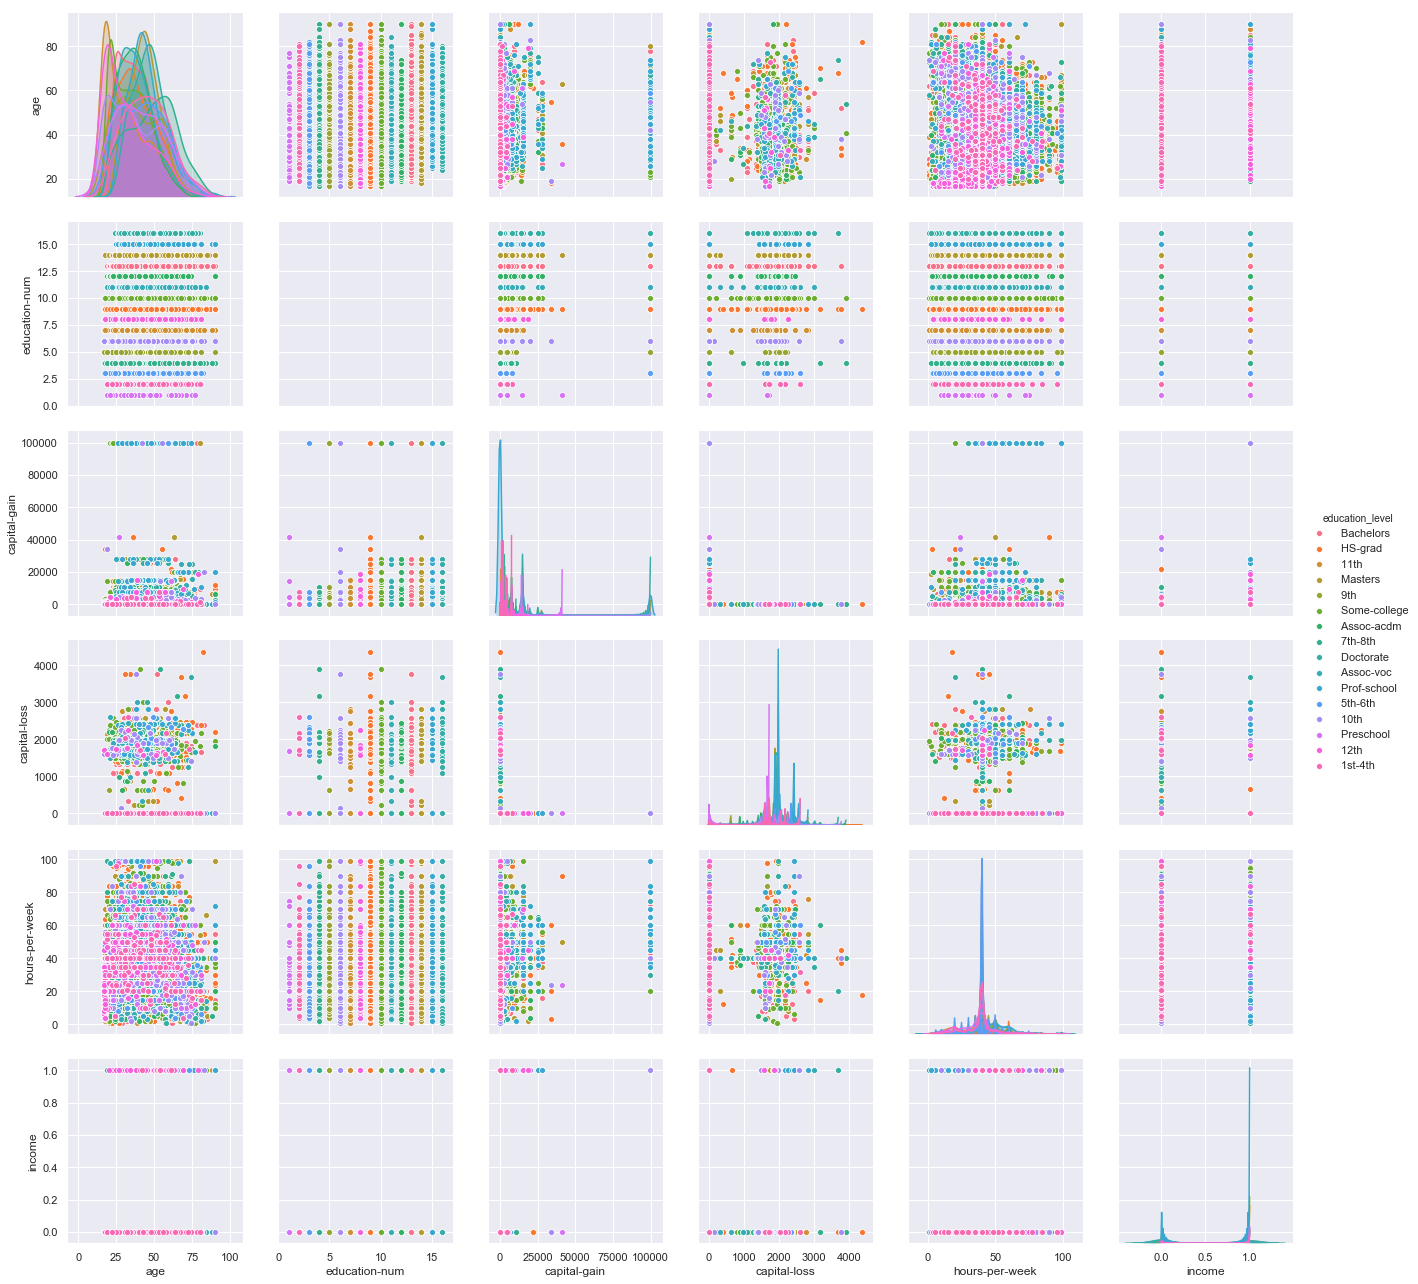

<Figure size 432x288 with 0 Axes>

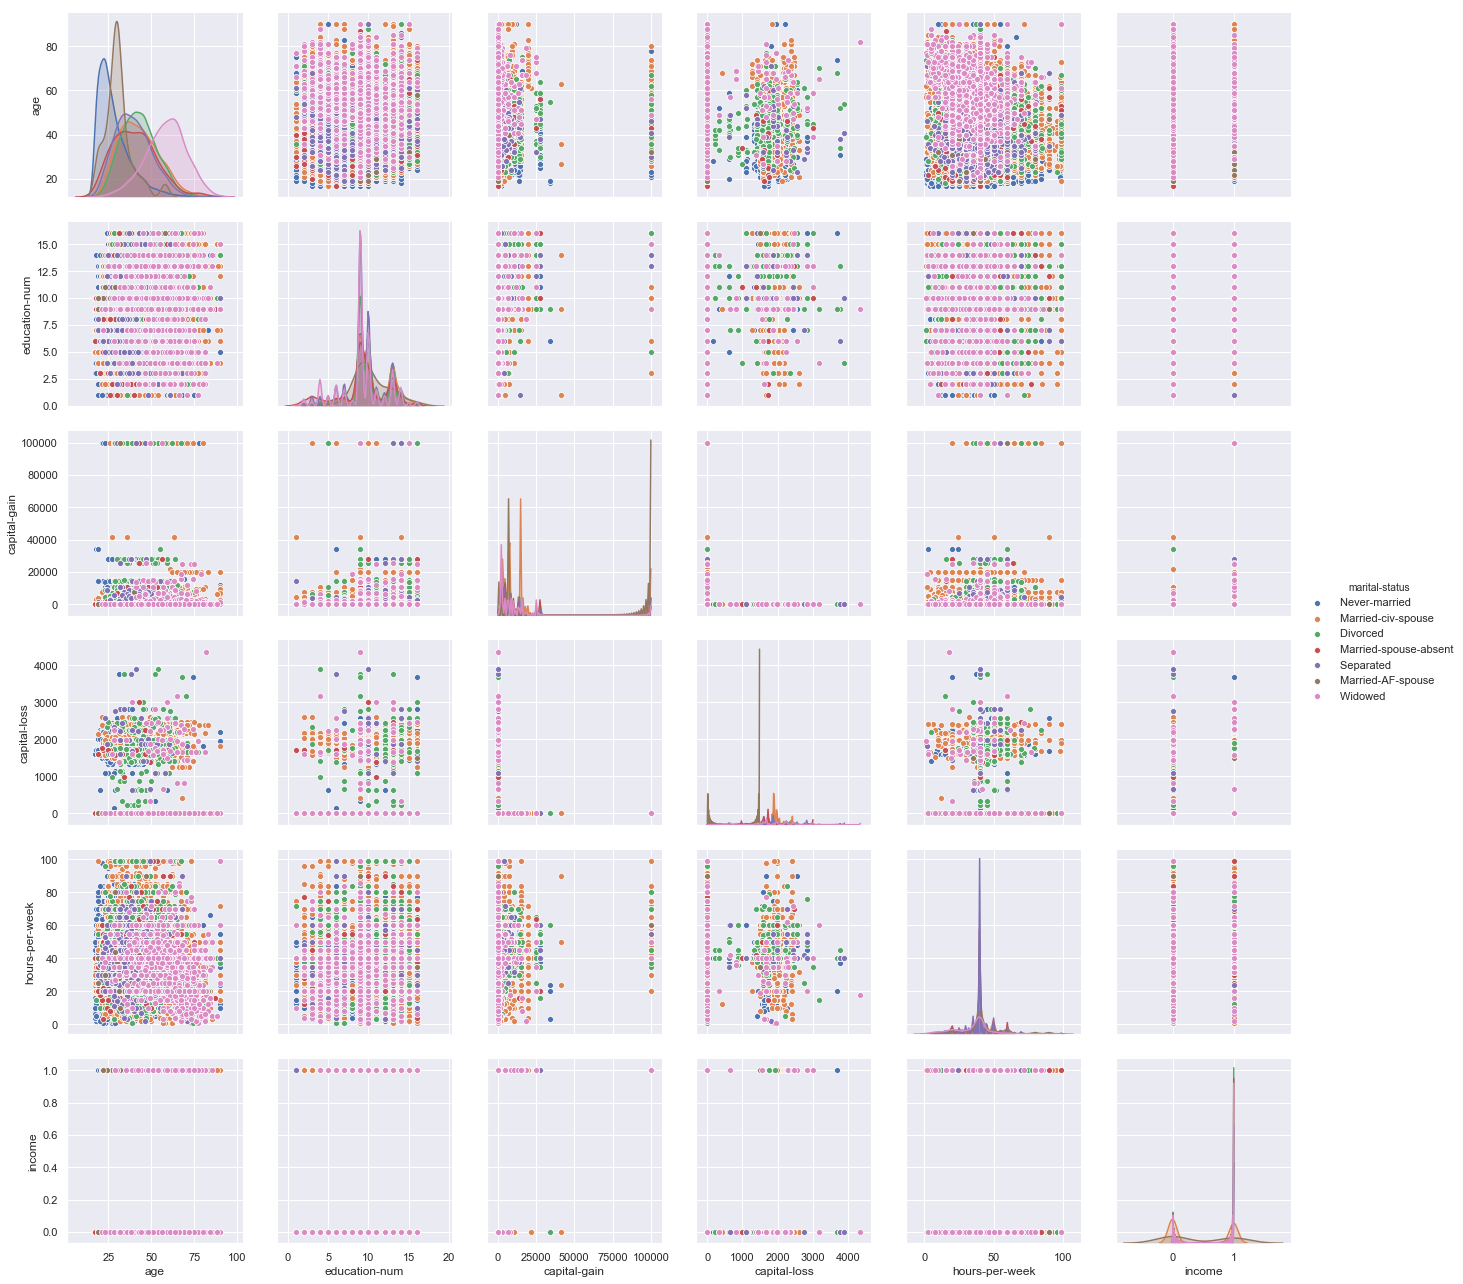

<Figure size 432x288 with 0 Axes>

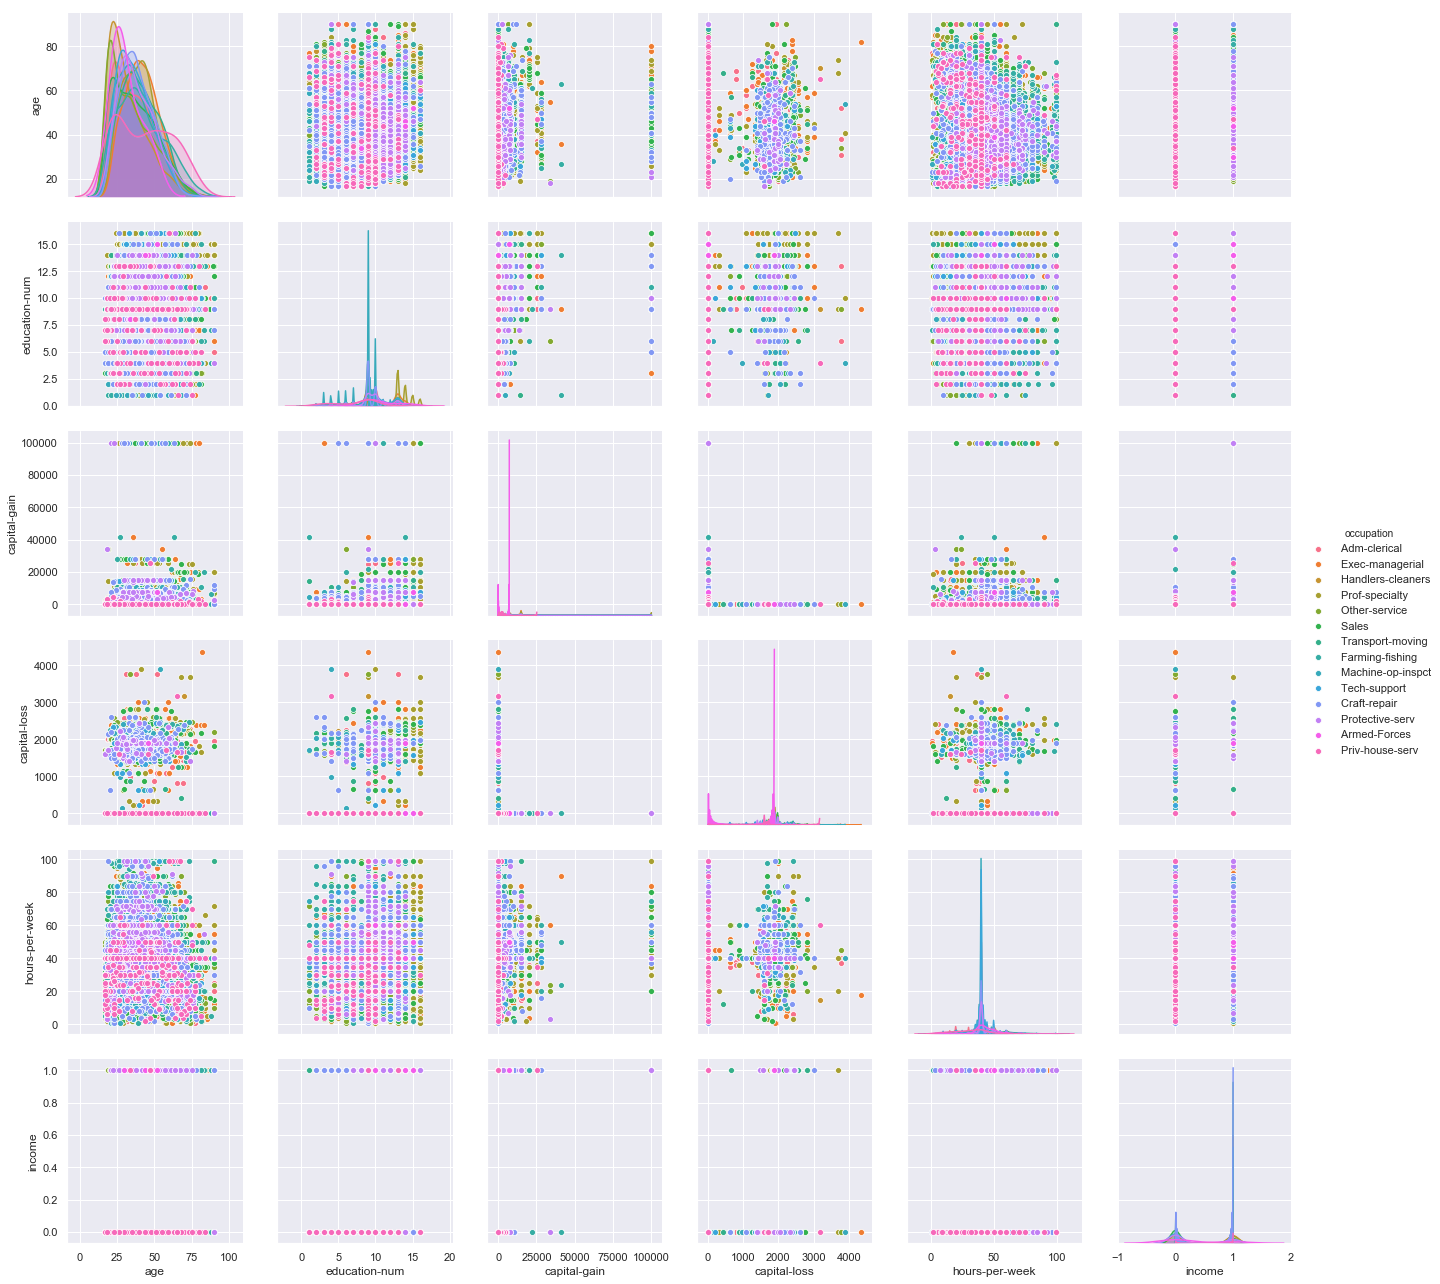

<Figure size 432x288 with 0 Axes>

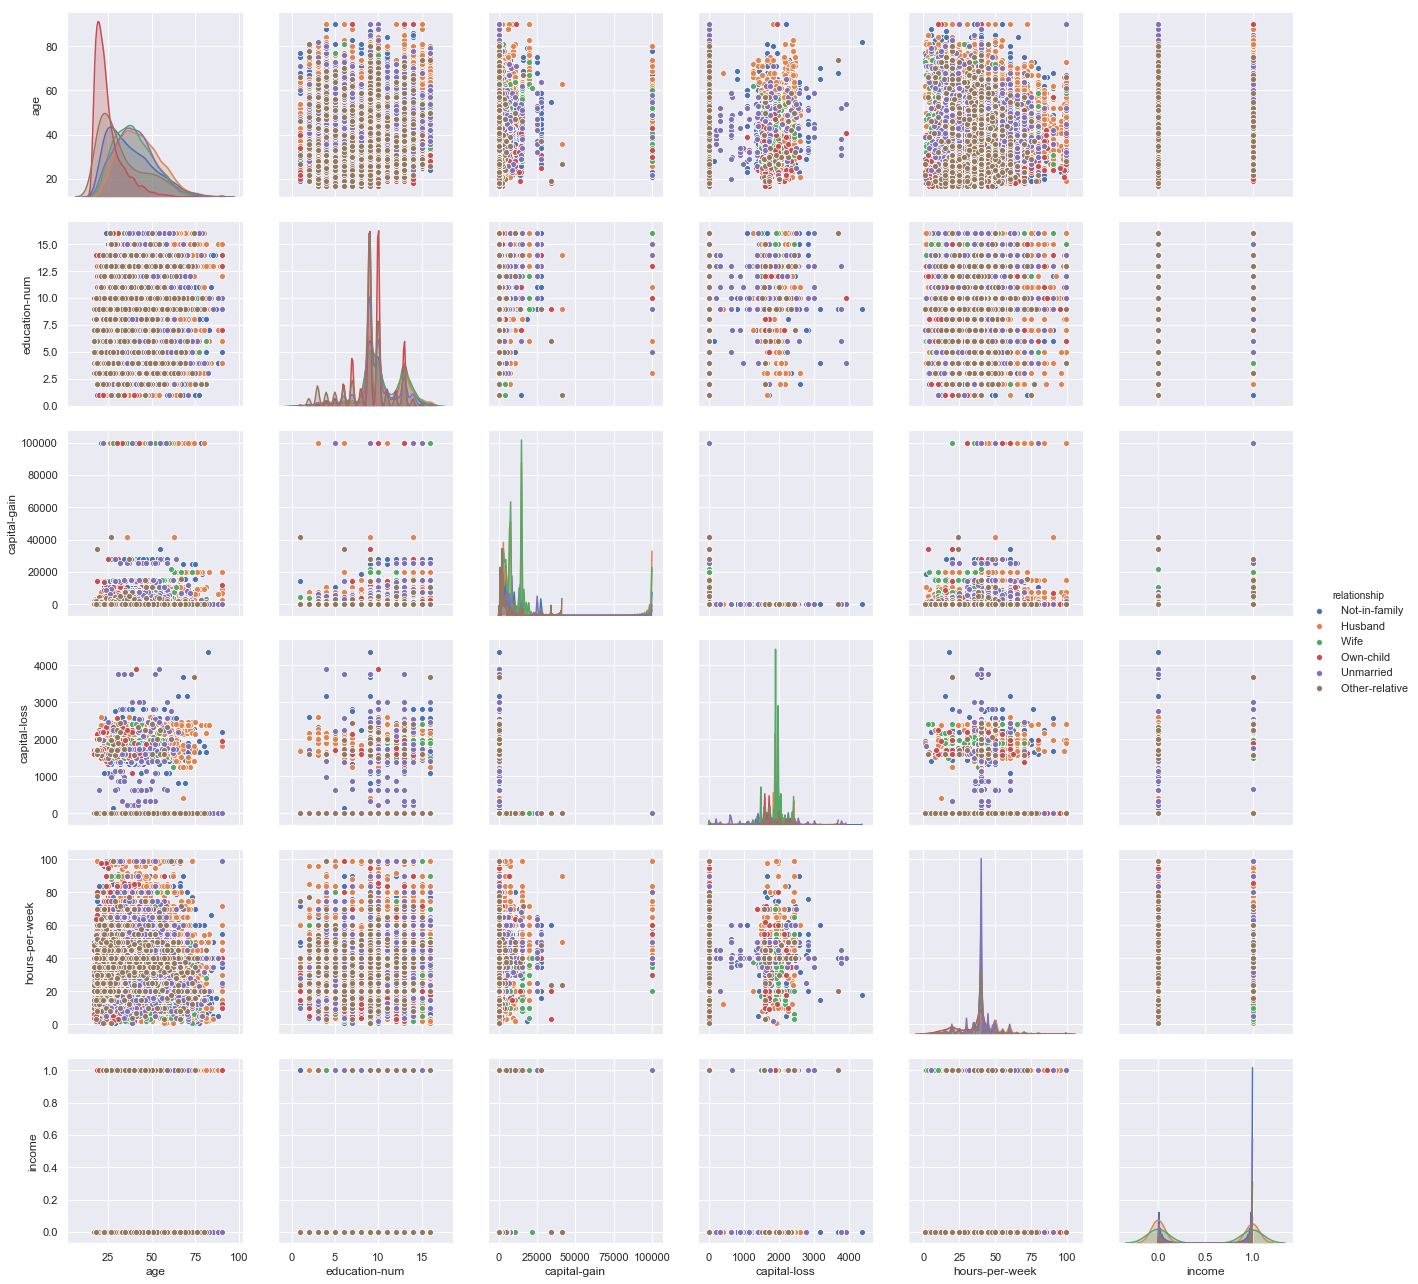

<Figure size 432x288 with 0 Axes>

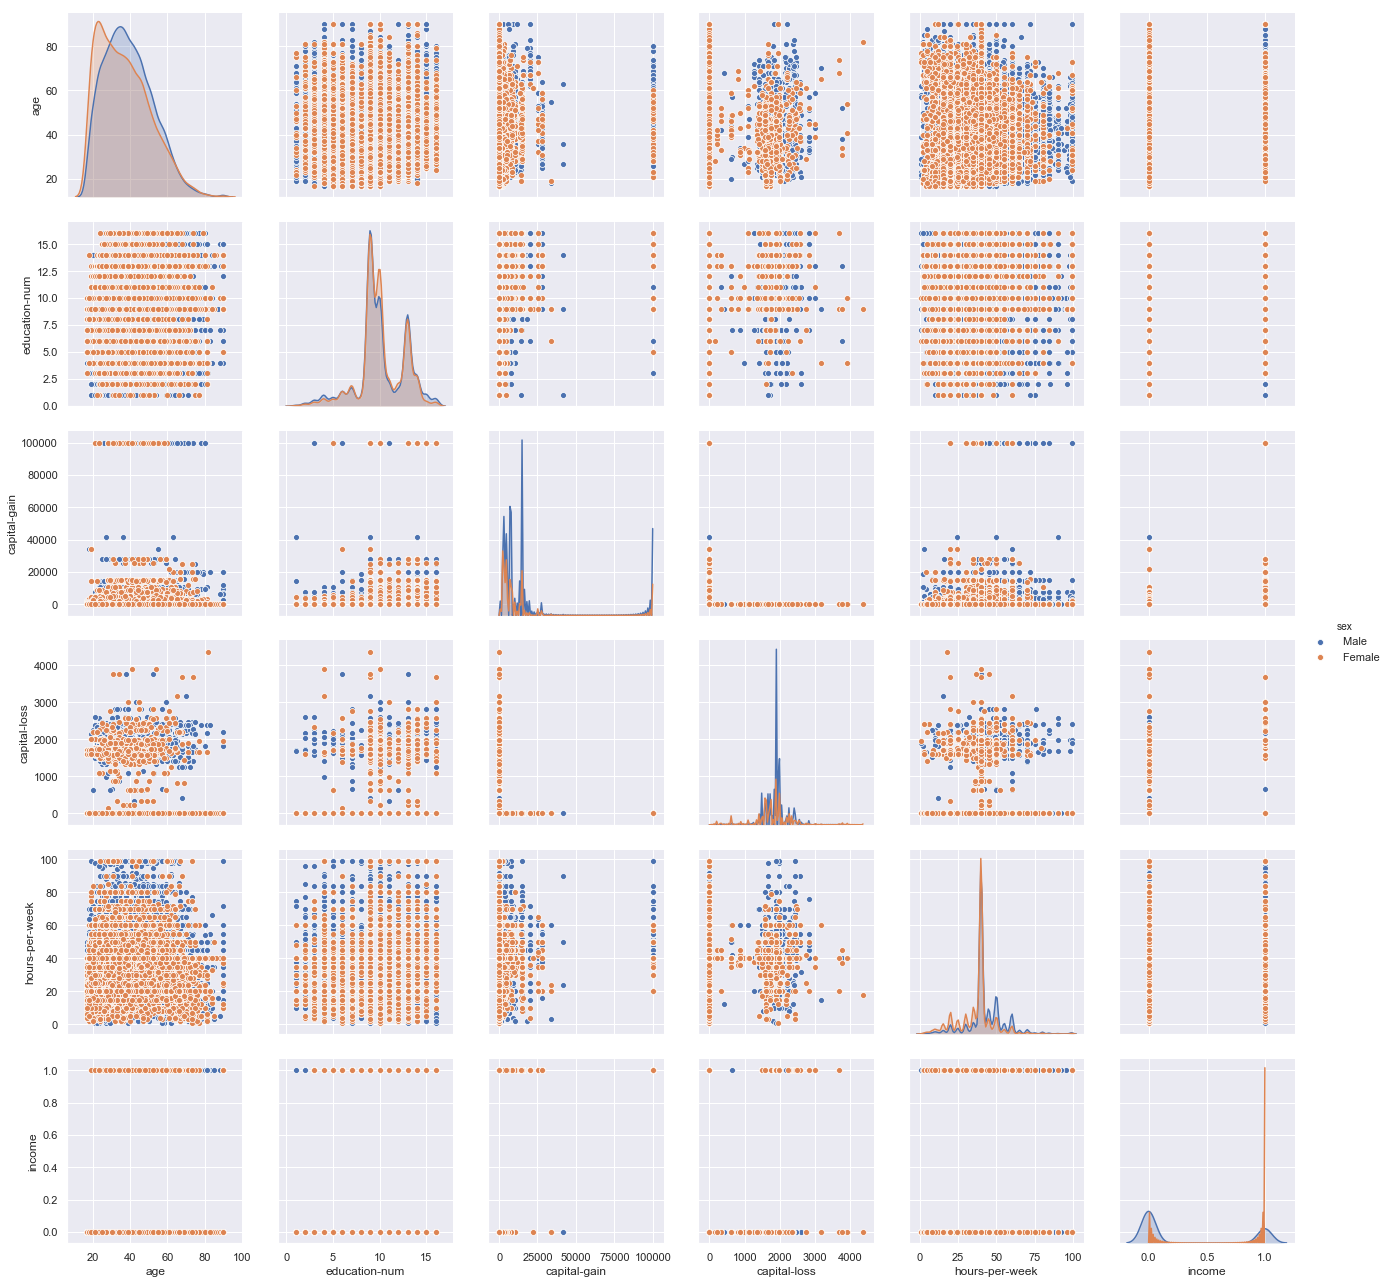

<Figure size 432x288 with 0 Axes>

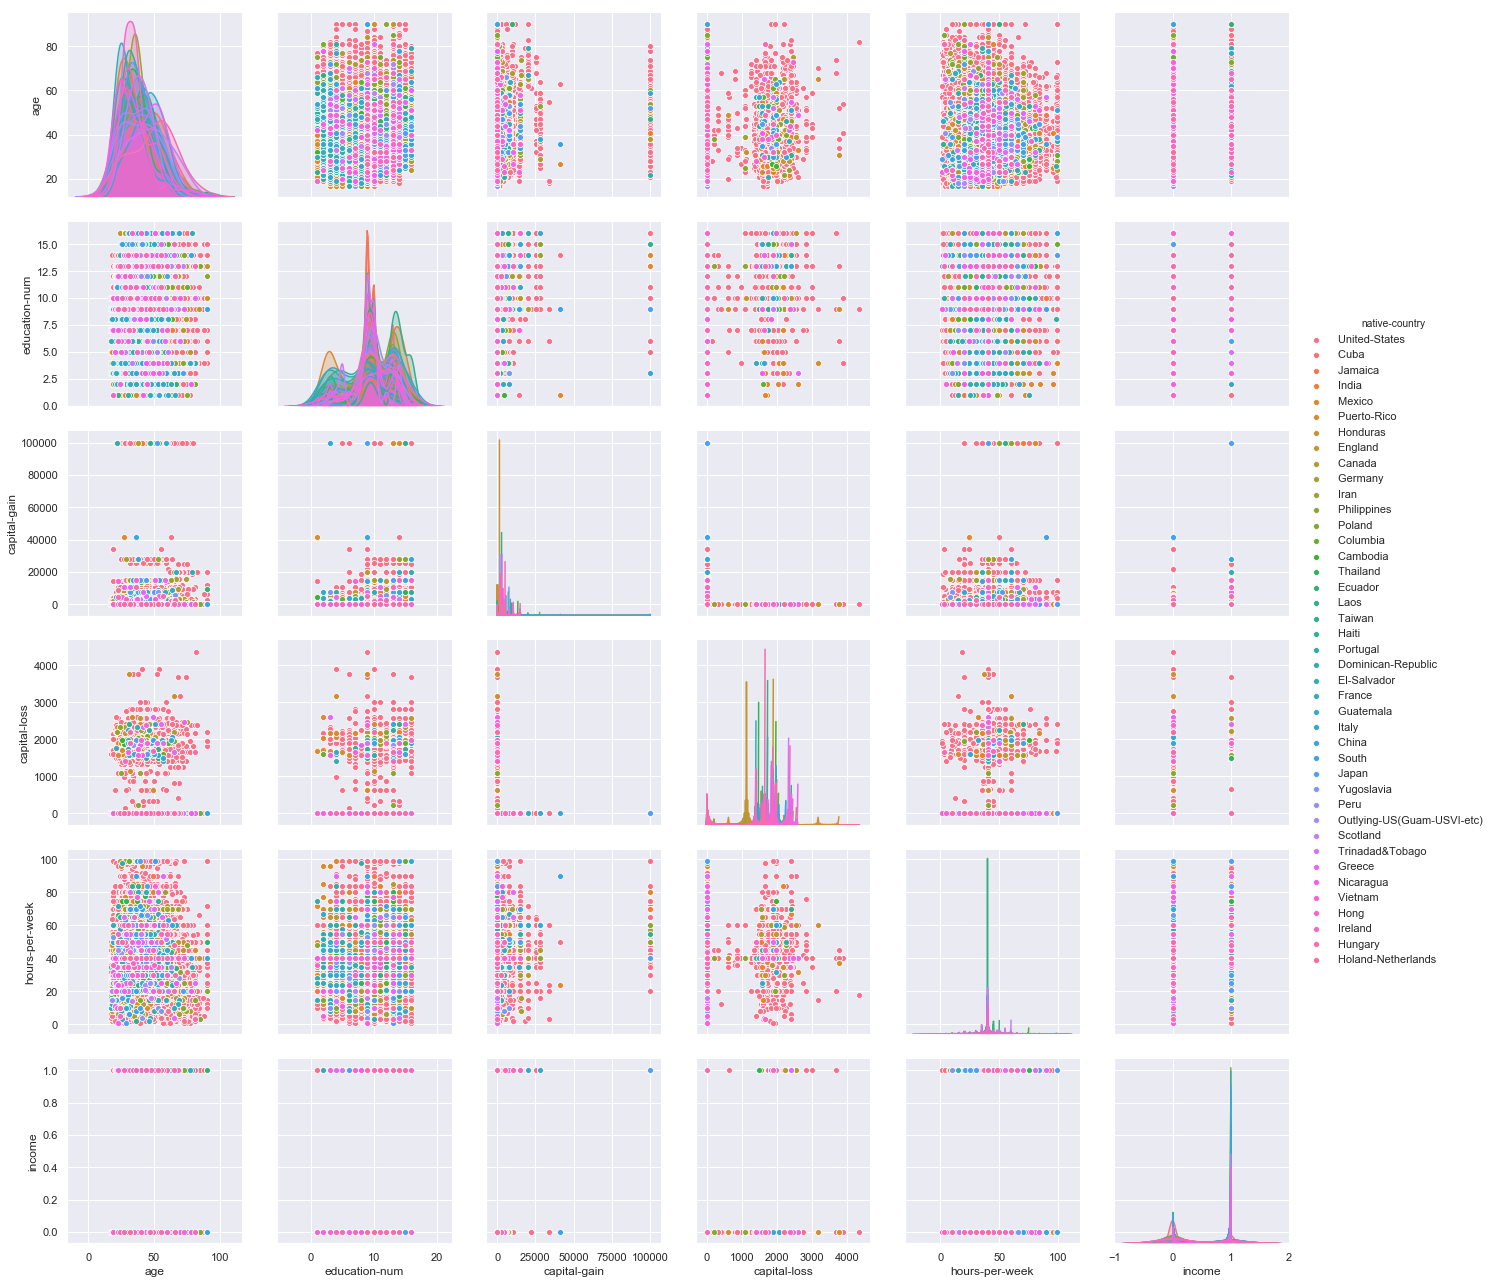

<Figure size 432x288 with 0 Axes>

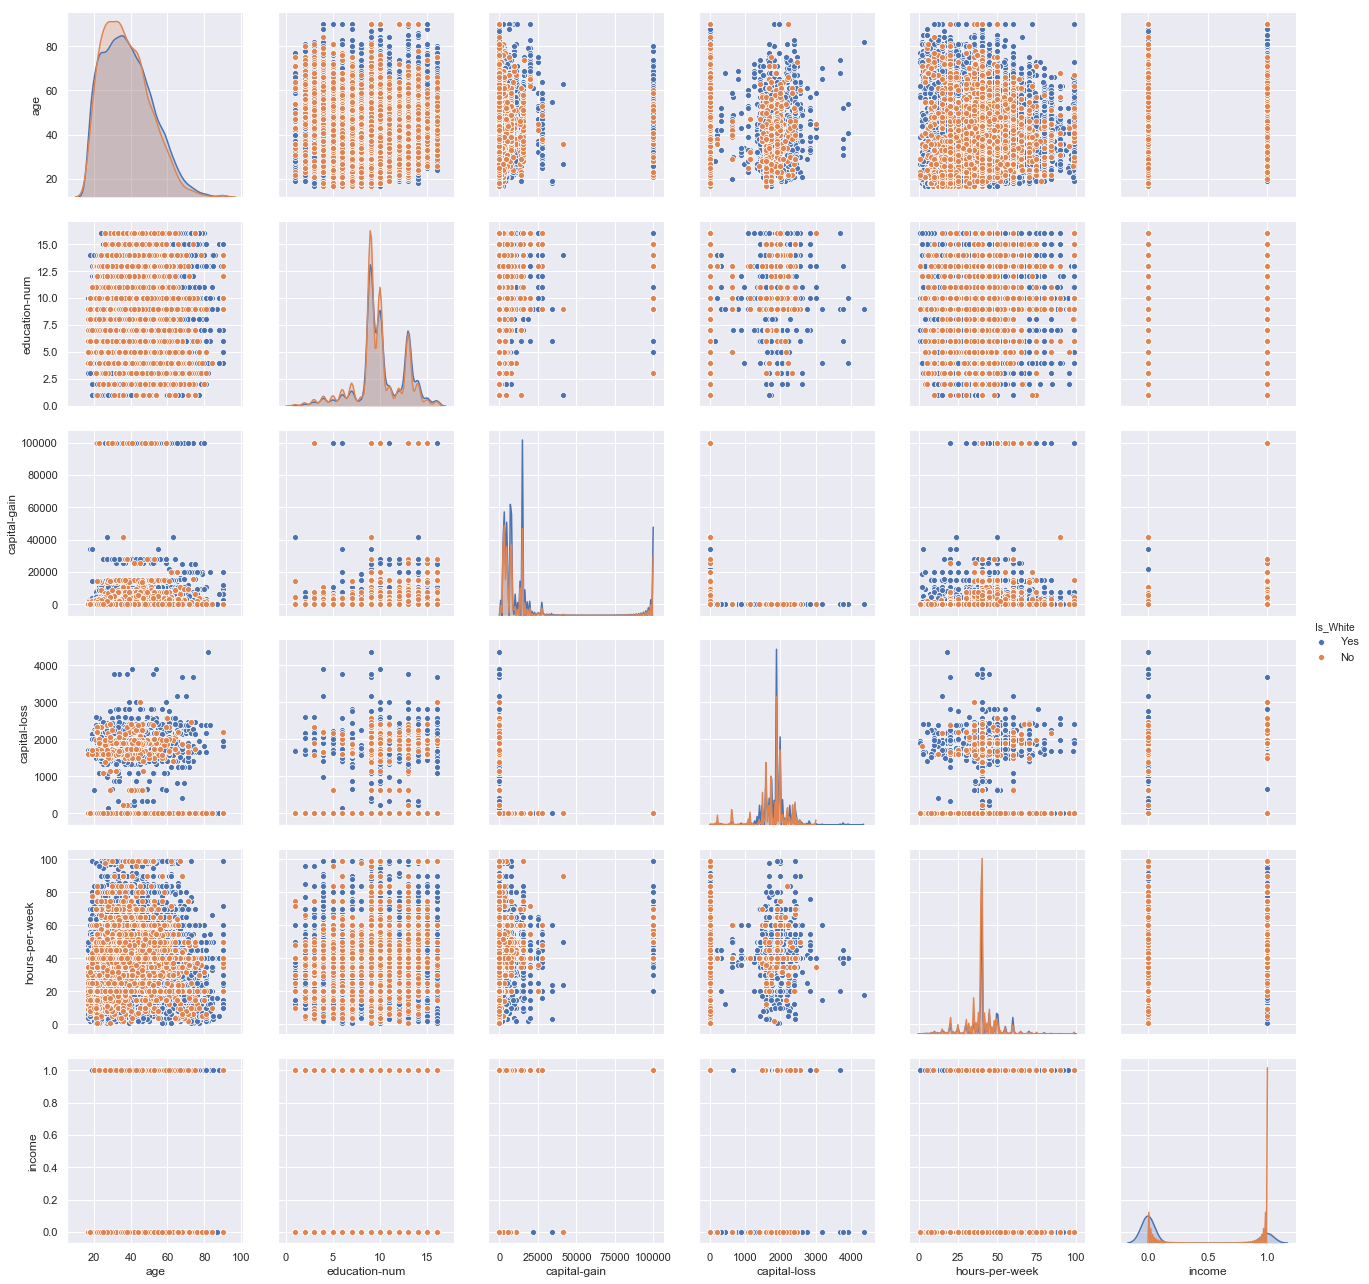

In [40]:
#Plotting the scatter plot of all the features
cat_col = ['workclass','education_level','marital-status','occupation','relationship','sex','native-country','Is_White']
for col in cat_col:
    sns.set()
    cols=list(data.columns)
    
    plt.figure()
    sns.pairplot(data[cols],size=3,hue=col)
    plt.show()
    

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 15 columns):
age                45222 non-null int64
workclass          45222 non-null object
education_level    45222 non-null object
education-num      45222 non-null float64
marital-status     45222 non-null object
occupation         45222 non-null object
relationship       45222 non-null object
sex                45222 non-null object
capital-gain       45222 non-null float64
capital-loss       45222 non-null float64
hours-per-week     45222 non-null float64
native-country     45222 non-null object
income             45222 non-null int64
Is_White           45222 non-null object
Is_USA             45222 non-null object
dtypes: float64(4), int64(2), object(9)
memory usage: 5.2+ MB


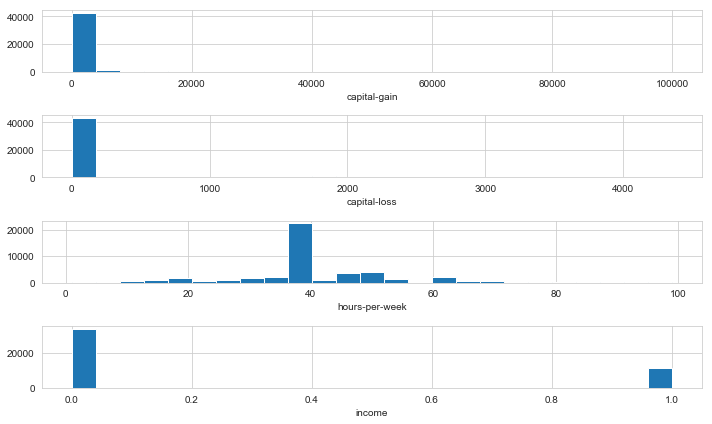

In [40]:
_, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 6))
x1 = data['capital-gain']
x2= data['capital-loss']
x3 = data['hours-per-week']
x4 = data['income']
axes[0].hist(x1,bins=25)
axes[0].set(xlabel='capital-gain')
axes[1].hist(x2,bins=25)
axes[1].set(xlabel='capital-loss')
axes[2].hist(x3,bins=25)
axes[2].set(xlabel='hours-per-week')
axes[3].hist(x4,bins=25)
axes[3].set(xlabel='income')


plt.tight_layout()

In [233]:
data[['capital-gain','capital-loss']] = data[['capital-gain','capital-loss']].apply(lambda x: np.log(x+1))

In [234]:
data.head()

age workclass education_level  education-num marital-status  \
0   39   Class_C         Level_3           13.0       Status_2   
1   50   Class_B         Level_3           13.0       Status_1   
2   38   Class_A         Level_1            9.0       Status_3   
3   53   Class_A         Level_4            7.0       Status_1   
4   28   Class_A         Level_3           13.0       Status_1   

           occupation    relationship      sex  capital-gain  capital-loss  \
0        Adm-clerical   Not-in-family     Male      7.684784           0.0   
1     Exec-managerial         Husband     Male      0.000000           0.0   
2   Handlers-cleaners   Not-in-family     Male      0.000000           0.0   
3   Handlers-cleaners         Husband     Male      0.000000           0.0   
4      Prof-specialty            Wife   Female      0.000000           0.0   

   hours-per-week  native-country  income Is_White Is_USA  
0            40.0   United-States       0      Yes    Yes  
1            13.0   United-States       0      Yes    Yes  
2            40.0   United-States       0      Yes    Yes  
3            40.0   United-States       0       No    Yes  
4            40.0            Cuba       0       No     No

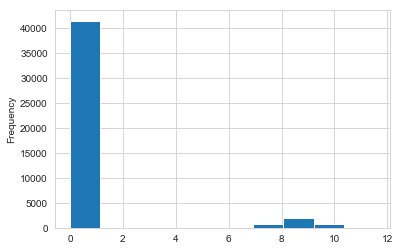

In [43]:
data['capital-gain'].plot.hist()  

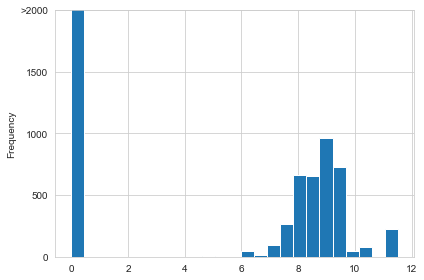

In [44]:
data['capital-gain'].plot.hist(bins=25)
plt.ylim((0, 2000))
plt.yticks([0, 500, 1000, 1500, 2000],[0, 500, 1000, 1500, ">2000"])
plt.tight_layout()

From the first plot of `capital-gain`, we see that no adequate information was displayed about the information as majority had `<1000`.Hence, in other to capture the other information i scaled the y-axis to capture all the other data which resulted to the `positively skewed distribution` in the 2nd chat. A skewed distribution will affect our model so it is important for it to be transformed as shown below using `Logarithmic Transformation`

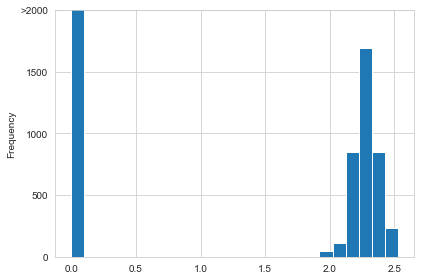

In [45]:
(np.log(data['capital-gain'] + 1)).plot.hist(bins=25)
plt.ylim((0, 2000))
plt.yticks([0, 500, 1000, 1500, 2000],[0, 500, 1000, 1500, ">2000"])
plt.tight_layout()

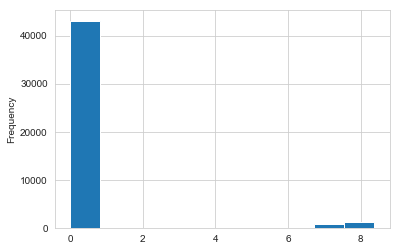

In [46]:
data['capital-loss'].plot.hist()  

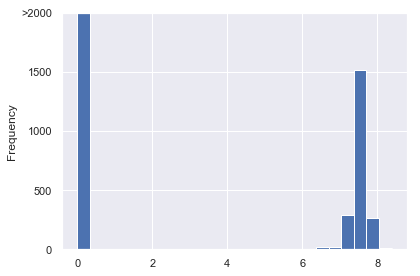

In [45]:
data['capital-loss'].plot.hist(bins=25)
plt.ylim((0, 2000))
plt.yticks([0, 500, 1000, 1500, 2000],[0, 500, 1000, 1500, ">2000"])
plt.tight_layout()

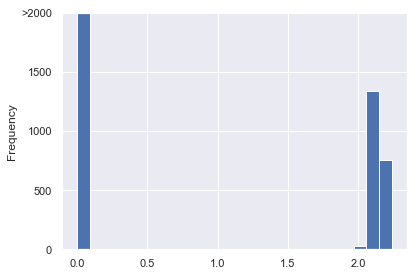

In [46]:
(np.log(data['capital-loss'] + 1)).plot.hist(bins=25)
plt.ylim((0, 2000))
plt.yticks([0, 500, 1000, 1500, 2000],[0, 500, 1000, 1500, ">2000"])
plt.tight_layout()

In [47]:
data.head()

age          workclass education_level  education-num       marital-status  \
0   39          State-gov       Bachelors           13.0        Never-married   
1   50   Self-emp-not-inc       Bachelors           13.0   Married-civ-spouse   
2   38            Private         HS-grad            9.0             Divorced   
3   53            Private            11th            7.0   Married-civ-spouse   
4   28            Private       Bachelors           13.0   Married-civ-spouse   

           occupation    relationship      sex  capital-gain  capital-loss  \
0        Adm-clerical   Not-in-family     Male      7.684784           0.0   
1     Exec-managerial         Husband     Male      0.000000           0.0   
2   Handlers-cleaners   Not-in-family     Male      0.000000           0.0   
3   Handlers-cleaners         Husband     Male      0.000000           0.0   
4      Prof-specialty            Wife   Female      0.000000           0.0   

   hours-per-week  native-country  income Is_White Is_USA  
0            40.0   United-States       0      Yes    Yes  
1            13.0   United-States       0      Yes    Yes  
2            40.0   United-States       0      Yes    Yes  
3            40.0   United-States       0       No    Yes  
4            40.0            Cuba       0       No     No

In [235]:
cat = ['workclass','education_level','marital-status','occupation','relationship',
      'sex','native-country','Is_White','Is_USA']
data = pd.get_dummies(data,columns=cat,drop_first=True)


In [237]:
data.head()

age  education-num  capital-gain  capital-loss  hours-per-week  income  \
0   39           13.0      7.684784           0.0            40.0       0   
1   50           13.0      0.000000           0.0            13.0       0   
2   38            9.0      0.000000           0.0            40.0       0   
3   53            7.0      0.000000           0.0            40.0       0   
4   28           13.0      0.000000           0.0            40.0       0   

   workclass_Class_B  workclass_Class_C  education_level_Level_2  \
0                  0                  1                        0   
1                  1                  0                        0   
2                  0                  0                        0   
3                  0                  0                        0   
4                  0                  0                        0   

   education_level_Level_3     ...      native-country_ Scotland  \
0                        1     ...                             0   
1                        1     ...                             0   
2                        0     ...                             0   
3                        0     ...                             0   
4                        1     ...                             0   

   native-country_ South  native-country_ Taiwan  native-country_ Thailand  \
0                      0                       0                         0   
1                      0                       0                         0   
2                      0                       0                         0   
3                      0                       0                         0   
4                      0                       0                         0   

   native-country_ Trinadad&Tobago  native-country_ United-States  \
0                                0                              1   
1                                0                              1   
2                                0                              1   
3                                0                              1   
4                                0                              0   

   native-country_ Vietnam  native-country_ Yugoslavia  Is_White_Yes  \
0                        0                           0             1   
1                        0                           0             1   
2                        0                           0             1   
3                        0                           0             0   
4                        0                           0             0   

   Is_USA_Yes  
0           1  
1           1  
2           1  
3           1  
4           0  

[5 rows x 75 columns]

In [238]:
data.shape

(45222, 75)

## Step 2 :  Model Creation and Evaluation 

This stage involve performing necessary algorithm for our Model to learn from the data and evaluating it performances. The process includes;

1. Using GridSearch to determine the Best algorithm and parameters that performs to be used on the data
2. Use evalution metrics to check algorithm and their performances
3. Predicting our test data

In [239]:
from sklearn.model_selection import train_test_split

In [240]:
X = data.drop(['income'],axis=1)
y = data['income']

In [241]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [242]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((31655, 74), (13567, 74), (31655,), (13567,))

In [243]:
from sklearn.metrics import accuracy_score, make_scorer,confusion_matrix,classification_report,fbeta_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [244]:
num_folds = 10
seed = 8
def get_best_model_and_accuracy(model, params, X, y):
    kfold = KFold(n_splits=num_folds, random_state=seed)
    grid = GridSearchCV(estimator=model, param_grid=params,error_score=0., cv=kfold)                         
    grid.fit(X, y)           # fit the model and parameters
    # our classical metric for performance
    print ("Best Accuracy: {}".format(grid.best_score_))
    # the best parameters that caused the best accuracy
    print ("Best Parameters: {}".format(grid.best_params_))
    # the average time it took a model to fit to the data (in seconds)
    print ("Average Time to Fit (s): {}".format(round(grid.cv_results_['mean_fit_time'].mean(), 3)))
    # the average time it took a model to predict out of sample data (in seconds)
    # this metric gives us insight into how this model will perform in real-time analysis
    print ("Average Time to Score (s): {}".format(round(grid.cv_results_['mean_score_time'].mean(), 3)))
    
    print ('Best parameter.{}'.format(grid.best_estimator_))


In [245]:
# Import four machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Set up some parameters for our grid search
# We will start with four different machine learning models
# logistic regression, KNN, Decision Tree, and Random Forest
lr_params = {'C':[1e-1, 1e0, 1e1, 1e2], 'penalty':['l1', 'l2']}
tree_params = {'max_depth': [None, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]}
forest_params = {'n_estimators': [10,20,30,40,50,70,90,100], 'max_depth': [None, 1, 3, 5, 7,8,9]}
knn_params = {'n_neighbors': [1, 3, 5, 7]}


# instantiate the four machine learning models
lr = LogisticRegression()
knn = KNeighborsClassifier()
d_tree = DecisionTreeClassifier()
forest = RandomForestClassifier()

In [246]:
get_best_model_and_accuracy(lr, lr_params, X, y)

Best Accuracy: 0.8412277210207422
Best Parameters: {'C': 1.0, 'penalty': 'l2'}
Average Time to Fit (s): 2.156
Average Time to Score (s): 0.005
Best parameter.LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


In [247]:
get_best_model_and_accuracy(d_tree, tree_params, X, y)

Best Accuracy: 0.8544071469638671
Best Parameters: {'max_depth': 11}
Average Time to Fit (s): 0.436
Average Time to Score (s): 0.006
Best parameter.DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=11,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [248]:
get_best_model_and_accuracy(forest, forest_params, X, y)

Best Accuracy: 0.8510459510857548
Best Parameters: {'max_depth': 9, 'n_estimators': 30}
Average Time to Fit (s): 1.69
Average Time to Score (s): 0.051
Best parameter.RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [249]:
model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [250]:
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [251]:
prediction = model.predict(X_test)

In [252]:
print ('Accuracy: ' + str(accuracy_score(y_test,prediction)))
print()
print('Confusion matrix: '+ str(confusion_matrix(y_test,prediction)))

print ()
print ("Classification Report " + str(classification_report(y_test,prediction)))

print ("F_beta score : " + str(fbeta_score(y_test,prediction,beta=0.5)))

Accuracy: 0.8532468489717697

Confusion matrix: [[9852  341]
 [1650 1724]]

Classification Report               precision    recall  f1-score   support

           0       0.86      0.97      0.91     10193
           1       0.83      0.51      0.63      3374

   micro avg       0.85      0.85      0.85     13567
   macro avg       0.85      0.74      0.77     13567
weighted avg       0.85      0.85      0.84     13567

F_beta score : 0.7409317517620766


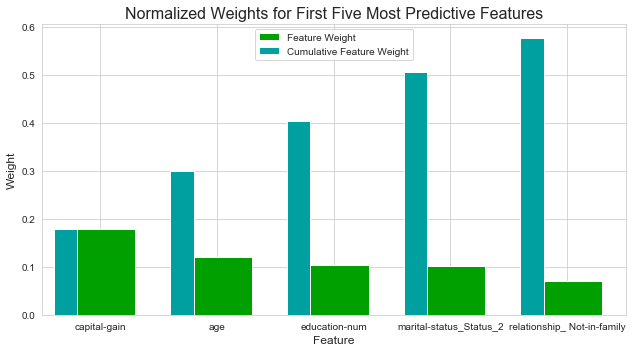

In [253]:
#
importances = model.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)
